# Requirements

In [67]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Configuration

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [ ]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, your goal is to perform web scraping on the website https://sandbox.oxylabs.io/products. Collect information on each product, specifically: name, price, rating, and availability. Organize the extracted data into a data frame. Finally, create a histogram to visually represent the price distribution of the products.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [6]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [13]:
# Write your code here. Add as many code boxes as you need.
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome(options=options)
browser.get('https://sandbox.oxylabs.io/products')

In [28]:
name = browser.find_element(By.CLASS_NAME, 'title')
price = browser.find_element(By.CLASS_NAME, 'price-wrapper')
rating = browser.find_element(By.CLASS_NAME, 'rating')
#availability = browser.find_element(By.CLASS_NAME, '
#print(name.text)
#print(price.text)

In [105]:
products = browser.find_elements(By.CLASS_NAME, 'product-card')
parsed_products = []

for product in products:
    name = product.find_element(By.CLASS_NAME, 'title').text.strip()
    price = product.find_element(By.CLASS_NAME, 'price-wrapper').text.replace(' €', '').replace(',', '.')
    stars = product.find_elements(By.TAG_NAME, 'svg')
    rating = len(stars)
    parag = product.find_elements(By.TAG_NAME, 'p')
    availability = parag[2].text

    product_dict = {
    "Name": name,
    "Price": price,
    "Availability": availability,
    "Rating:": rating
    }

    parsed_products.append(product_dict)

In [109]:
df

,Name,Price,Availability,Rating:
0,The Legend of Zelda: Ocarina of Time,91.99,In stock,5
1,Super Mario Galaxy,91.99,Out of Stock,5
2,Super Mario Galaxy 2,91.99,In stock,5
3,Metroid Prime,89.99,Out of Stock,5
4,Super Mario Odyssey,89.99,In stock,5
5,Halo: Combat Evolved,87.99,Out of Stock,5
6,The House in Fata Morgana - Dreams of the Reve...,83.99,In stock,5
7,NFL 2K1,62.99,Out of Stock,5
8,Uncharted 2: Among Thieves,88.99,In stock,5
9,Tekken 3,91.99,Out of Stock,5


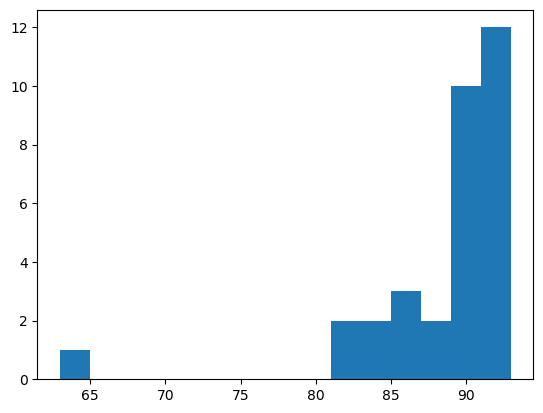

In [107]:
df = pd.DataFrame(parsed_products)
df
plt.hist(df['Price'].astype(float), bins=15)
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each product listed on the page, proceed to the individual page for each product, and extract the product description. Subsequently, you are required to compute both the mean and standard deviation of the number of characters of the product descriptions.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

In [ ]:
# Write your code here. Add as many code boxes as you need.